<font color='blue'>Привет! Поздравляю с уже третьим выполненным проектом. Кажется, намерения у тебя серьезные. Меня зовут Алексей, я проверю твою работу и напишу свои комментарии. Они, в зависимости от результата проверки, будут в </font><font color='green'>зеленом (когда все отлично),</font> <font color='brown'>коричневом (когда можно лучше)</font><font color='blue'> или</font> <font color='red'>красном (когда нужно переделать, чтобы я принял работу). </font><font color='blue'> Ну и в синем будут просто советы и нейтральные комментарии. Постарайся учесть все это в дальнейших проектах.   
Апдейт после проверки: очень хорошая работа, замечания касаются довольно мелких недочетов.    
    Более подробно см. блок в конце.</font>

# Определение перспективного тарифа для телеком компании
### Описание проекта
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Задачи исследования
#### 1. Ознакомление с данными: 
- Импортирование библиотек 
- Предварительный просмотр данных 
- Общее получение информации для дальнейшего анализа
- Предварительные выводы

#### 2. Подготовка данных: 
- Привести данные к нужным типам 
- Проверка данных на наличие дубликатов и пропусков
- Удаление дубликатов и обработка пропусков

##### Посчитать для каждого пользователя: 
- количество сделанных звонков и израсходованных минут разговора по месяцам
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя

####  3. Анализ данных
Описать поведение клиентов оператора, исходя из выборки:
- Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
- Посчитать среднее количество, дисперсию и стандартное отклонение. Построить гистограммы. Описать распределения.

#### 4. Проверка гипотез
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

<s><font color='brown'>В начале работы хорошо коротко описать наши данные и наметить короткий план. В таком случае работа смотрится цельно, и её смогу оценить не только я, но и посторонний человек, в том числе потенциальный работодатель.</s> <font color='black'>(добавлено) 

### Шаг 1. Откройте файл с данными и изучите общую информацию
Для начала импортируем библиотеки и получим все данные

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pprint
import random
from math import factorial
from scipy import stats as st
from scipy.stats import norm

from pymystem3 import Mystem
from collections import Counter

In [2]:
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

In [3]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

Описание данных. 
Рассмотрим теперь все импортируемые таблицы

#### Таблица с пользователями

In [4]:
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
users.describe()

,user_id,age
count,500.00,500.00
mean,"1,249.50",46.59
std,144.48,16.67
min,"1,000.00",18.00
25%,"1,124.75",32.00
50%,"1,249.50",46.00
75%,"1,374.25",62.00
max,"1,499.00",75.00


#### Таблица с информацией о звонках

In [7]:
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [8]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [9]:
calls.describe()

,duration,user_id
count,"202,607.00","202,607.00"
mean,6.76,"1,253.94"
std,5.84,144.72
min,0.00,"1,000.00"
25%,1.30,"1,126.00"
50%,6.00,"1,260.00"
75%,10.70,"1,379.00"
max,38.00,"1,499.00"


#### Таблица с информацией о сообщениях

In [10]:
messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [11]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [12]:
messages.describe()

,user_id
count,"123,036.00"
mean,"1,256.99"
std,143.52
min,"1,000.00"
25%,"1,134.00"
50%,"1,271.00"
75%,"1,381.00"
max,"1,499.00"


#### Таблица с информацией об интернет-сессиях

In [13]:
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,"1,052.81",2018-09-07,1000
2,2,1000_2,"1,197.26",2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


<font color=blue>Колонка `Unnamed: 0` здесь лишняя, она полностью дублирует индекс. Её стоит удалить.  
    Или можно поступить так: метод `read_csv()` по умолчанию сам создает колонку с индексами. В данном случае, колонка с индексами у нас уже имеется, и мы можем сразу сделать её индексом датафрейма, указав `index_col=0`. Тогда ничего удалять не придется.

In [14]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [15]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,"149,396.00","149,396.00","149,396.00"
mean,"74,697.50",370.19,"1,252.10"
std,"43,127.05",278.30,144.05
min,0.00,0.00,"1,000.00"
25%,"37,348.75",138.19,"1,130.00"
50%,"74,697.50",348.01,"1,251.00"
75%,"112,046.25",559.55,"1,380.00"
max,"149,395.00","1,724.83","1,499.00"


#### Таблица с информацией о тарифах

In [16]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [17]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [18]:
tariffs.describe()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.00,2.00,2.00,2.00,2.00,2.00,2.00
mean,525.00,"23,040.00","1,750.00","1,250.00",175.00,2.00,2.00
std,671.75,"10,861.16","1,767.77",989.95,35.36,1.41,1.41
min,50.00,"15,360.00",500.00,550.00,150.00,1.00,1.00
25%,287.50,"19,200.00","1,125.00",900.00,162.50,1.50,1.50
50%,525.00,"23,040.00","1,750.00","1,250.00",175.00,2.00,2.00
75%,762.50,"26,880.00","2,375.00","1,600.00",187.50,2.50,2.50
max,"1,000.00","30,720.00","3,000.00","1,950.00",200.00,3.00,3.00


### Вывод
Для дальнейшего анализа приведем данные в таблицах впорядок.

<font color='green'>Данные загружены и изучены. Используются верные методы для получения общей информации о таблице.

### Шаг 2. Подготовка данных
- Приведите данные к нужным типам;
- Найдите и исправьте ошибки в данных.
Поясните, какие ошибки вы нашли и как их исправили. Обратите внимание, что длительность многих звонков — 0.0 минут. Это могут быть пропущенные звонки. Обрабатывать ли эти нулевые значения, решать вам — оцените, как их отсутствие повлияет на результаты анализа.

Посчитайте для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

#### В таблице users мы наблюдаем следующие проблемы: 
- В столбце churn_date наблюдаем огромное количество пропусков (однако в описании проекта сказано: если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- Необходимо поменять тип данных в столбцах reg_date и churn_date на datime 
- Добавить столбец "месяц", так как он будет нужен для дальнейшего анализа
- Проверить таблицы на наличие дубликатов 

In [19]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format="%Y-%m-%d")
users['reg_date'] = pd.to_datetime(users['reg_date'], format="%Y-%m-%d")

In [20]:
users['month'] = users['churn_date'].dt.month_name()
users['month'] = users['reg_date'].dt.month_name()

In [21]:
users.duplicated().sum()

0

In [22]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,May
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,November
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,June
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,August
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,May


- Оставили пропуска в churn_date
- Поменяли тип данных в столбцах eg_date и churn_date
- Добавили новый столбец month
- Дубликатов в таблице нет

#### В таблице calls мы наблюдаем следующие проблемы: 
- В столбце call_date необходимо поменять тип данных на datetime
- Добавить столбец "месяц", так как он может пригодиться для дальнейшего анализы
- Поменять тип данных на int в столбце "id"
- Проверить таблицы на наличие дубликатов

P.S. Пропуски в таблице не наблюдаем

Также надо посчитать количество сделанных звонков и израсходованных минут разговора по месяцам

In [23]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format="%Y-%m-%d")

In [24]:
calls['month'] = calls['call_date'].dt.month_name()

In [25]:
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')

In [26]:
calls['id'].astype('int')

0           10000
1           10001
2           10002
3           10003
4           10004
           ...   
202602    1499215
202603    1499216
202604    1499217
202605    1499218
202606    1499219
Name: id, Length: 202607, dtype: int64

In [27]:
calls.duplicated().sum()

0

In [28]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
month        202607 non-null object
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 7.7+ MB


- Изменили тип данных в столбцах: id и call_date
- Добавили столбец месяц 
- Проверили на наличие дубликатов, дубликатов нет

#### В таблице messages мы наблюдаем следующие проблемы:
- В столбце message_date необходимо поменять тип данных на datetime
- Добавить столбец "месяц", так как он может пригодиться для дальнейшего анализы
- Поменять тип данных на int в столбце "id"
- Проверить таблицы на наличие дубликатов

In [29]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format="%Y-%m-%d")

In [30]:
messages['month'] = messages['message_date'].dt.month_name()

In [31]:
messages['id'].astype('int')

0           10000
1           10001
2           10002
3           10003
4           10004
           ...   
123031    1499179
123032    1499180
123033    1499181
123034    1499182
123035    1499183
Name: id, Length: 123036, dtype: int64

In [32]:
messages.duplicated().sum()

0

In [33]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
month           123036 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.8+ MB


- Изменили тип данных в столбцах: id и message_date
- Добавили столбец месяц
- Проверили на наличие дубликатов, дубликатов нет

#### В таблице internet мы наблюдаем следующие проблемы:
- В столбце session_date необходимо поменять тип данных на datetime
- Добавить столбец "месяц", так как он может пригодиться для дальнейшего анализы
- Поменять тип данных на int в столбце "id"
- Проверить таблицы на наличие дубликатов

In [34]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format="%Y-%m-%d")

In [35]:
internet['month'] = internet['session_date'].dt.month_name()

In [36]:
internet['id'].astype('int')

0           10000
1           10001
2           10002
3           10003
4           10004
           ...   
149391    1499152
149392    1499153
149393    1499154
149394    1499155
149395    1499156
Name: id, Length: 149396, dtype: int64

In [37]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil).astype('int')

<b>UPD: <font color='green'>Теперь все корректно. 👍

In [38]:
messages.duplicated().sum()

0

In [39]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,113,2018-11-25,1000,November
1,1,1000_1,1053,2018-09-07,1000,September
2,2,1000_2,1198,2018-06-25,1000,June
3,3,1000_3,551,2018-08-22,1000,August
4,4,1000_4,303,2018-09-24,1000,September


- Изменили тип данных в столбцах: id и session_date
- Добавили столбец месяц
- Проверили на наличие дубликатов, дубликатов нет

<font color='green'>Данные приведены в порядок и готовы к аггрегации, отлично.

#### Считаем количество сделанных звонков и израсходованных минут разговора по месяцам:

In [40]:
calls_duration = calls.groupby(['user_id','month']) \
                      .agg({'id':'count','duration':'sum'}) \
                      .rename(columns={'duration':'month_calls_month','id':'calls_total_month'})\

In [41]:
calls_duration.head(15)

calls_total_month  month_calls_month
user_id month                                          
1000    August                    52                408
        December                  46                333
        July                      47                340
        June                      43                172
        May                       22                159
        November                  43                338
        October                   57                350
        September                 58                466
1001    December                  63                414
        November                  59                430
1002    August                    42                289
        December                  33                236
        July                      26                214
        June                      15                117
        November                  32                243

~~<font color='red'>Все верно, но есть одно но - в задании сказано, что оператор округляет вверх значения минут и мегабайтов. И не забудь привести к целочисленному типу после округления.~~ <font color='black'> исправлено (исправил выше, где приводил данные по таблице calls впорядок)

#### Считаем количество отправленных сообщений по месяцам:

In [42]:
messages_duration = messages.groupby(['user_id','month']) \
                            .agg({'id':'count'}) \
                            .rename(columns={'id':'sms_total_month'})\

In [43]:
messages_duration.head(15)

sms_total_month
user_id month                     
1000    August                  81
        December                70
        July                    75
        June                    60
        May                     22
        November                58
        October                 73
        September               57
1002    August                  13
        December                12
        July                    11
        June                     4
        November                16
        October                 10
        September                4

#### Объем израсходованного интернет-трафика по месяцам;

In [44]:
internet_duration = internet.groupby(['user_id','month'])\
                            .agg({'mb_used':'sum'})\
                            .rename(columns={'mb_used':'traffic_total_month'})\

In [45]:
internet_duration.head()

traffic_total_month
user_id month                        
1000    August                  14070
        December                 9827
        July                    14016
        June                    23257
        May                      2256

~~<font color='brown'>В случае с мегабайтами округление не так критично, но тоже не помешает.~~<font color='black'> (исправил выше, где приводил данные по таблице internet впорядок)

<font color='green'>Как бы то ни было, в таблицы успешно добавлена информация о месяцах. Данные аггрегированы верно.

#### Объединим все в одну таблицу: 

In [46]:
duration_union = calls_duration.merge(messages_duration, on= ['user_id','month'], how= 'outer').merge(internet_duration, on= ['user_id','month'], how= 'outer')

In [47]:
duration_union.head(10)

calls_total_month  month_calls_month  sms_total_month  \
user_id month                                                              
1000    August                 52.00             408.00            81.00   
        December               46.00             333.00            70.00   
        July                   47.00             340.00            75.00   
        June                   43.00             172.00            60.00   
        May                    22.00             159.00            22.00   
        November               43.00             338.00            58.00   
        October                57.00             350.00            73.00   
        September              58.00             466.00            57.00   
1001    December               63.00             414.00              nan   
        November               59.00             430.00              nan   

                   traffic_total_month  
user_id month                           
1000    August               14,070.00  
        December              9,827.00  
        July                 14,016.00  
        June                 23,257.00  
        May                   2,256.00  
        November             14,768.00  
        October              14,717.00  
        September            14,581.00  
1001    December             14,053.00  
        November             18,452.00

<font color='green'>Данные объеденены верно. Молодец, что используешь метод объединения outer, так мы не теряем строки.

#### Посчитаем помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [48]:
#Для начала проверим нашу общую таблицу на пропуски. 
duration_union.isnull().sum()

calls_total_month       40
month_calls_month       40
sms_total_month        497
traffic_total_month     11
dtype: int64

Мы видим пропуски во всех столбцах, с чем они могли бы быть связаны? Возможно, люди не пользовались в какие-то периоднами определенными типами связи, которые входят к ним в тариф. Мне кажется,можно было бы попробовать заполнить 0. Будем подразумевать, что 0 означает, что человек просто не пользовался этой услугой. 

In [49]:
duration_union['calls_total_month'] = duration_union['calls_total_month'].fillna(0)
duration_union['month_calls_month'] = duration_union['month_calls_month'].fillna(0)
duration_union['sms_total_month'] = duration_union['sms_total_month'].fillna(0)
duration_union['traffic_total_month'] = duration_union['traffic_total_month'].fillna(0)

<font color='green'>Все верно, многие не пользуются СМС как таковыми.

In [50]:
duration_union.isnull().sum()

calls_total_month      0
month_calls_month      0
sms_total_month        0
traffic_total_month    0
dtype: int64

In [51]:
#Проверим, на всякий случай, на наличии дубликатов
duration_union.duplicated().sum()

0

In [52]:
#Добавим к нашей объедененной таблице информацию о тарифах для каждого пользователя
duration_union = duration_union.merge(users, on = 'user_id', how='left')
duration_union.head()

,user_id,calls_total_month,month_calls_month,sms_total_month,traffic_total_month,age,churn_date,city,first_name,last_name,reg_date,tariff,month
0,1000,52.00,408.00,81.00,"14,070.00",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,May
1,1000,46.00,333.00,70.00,"9,827.00",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,May
2,1000,47.00,340.00,75.00,"14,016.00",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,May
3,1000,43.00,172.00,60.00,"23,257.00",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,May
4,1000,22.00,159.00,22.00,"2,256.00",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,May


<font color='brown'>Здесь имеет смысл взять из таблицы users только необходимые столбцы, чтобы не таскать за собой ненужные данные типа имени.

In [53]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [54]:
#Для того, чтобы объединить таблицы по столбцу, переименуем стобец tariff_name в tariff
tariffs.rename(columns={'tariff_name': 'tariff'}, inplace=True)

In [55]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [56]:
duration_union = duration_union.merge(tariffs, on='tariff', how='left')
duration_union.head()

,user_id,calls_total_month,month_calls_month,sms_total_month,traffic_total_month,age,churn_date,city,first_name,last_name,reg_date,tariff,month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52.00,408.00,81.00,"14,070.00",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,May,1000,30720,3000,1950,150,1,1
1,1000,46.00,333.00,70.00,"9,827.00",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,May,1000,30720,3000,1950,150,1,1
2,1000,47.00,340.00,75.00,"14,016.00",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,May,1000,30720,3000,1950,150,1,1
3,1000,43.00,172.00,60.00,"23,257.00",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,May,1000,30720,3000,1950,150,1,1
4,1000,22.00,159.00,22.00,"2,256.00",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,May,1000,30720,3000,1950,150,1,1


<font color='green'>Получилась очень удобная компактная таблица, содержащая все необходимые данные. Очень хорошо. 

In [57]:
#Проверим нашу финальную таблицу для анализы на пропуски и дубликаты
duration_union.duplicated().sum()

0

In [58]:
duration_union.isnull().sum()

user_id                     0
calls_total_month           0
month_calls_month           0
sms_total_month             0
traffic_total_month         0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
month                       0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

Отлично, таблица готова к дальнейшим действиям =) 
P.S. Напомню, что пропуски в столбце churn_date говорят о том, что тариффом пользовались на момент собирания данных. 

Вычтим бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану. Добавим новый стобец, в котором как раз будет помесечная выручка пользователя.

In [59]:
# Для начала в цикле займемся первыми расчетами: 
def higher_tariff(row):
    call = (row['month_calls_month'] - row['minutes_included']) * row['rub_per_minute']
    sms = (row['sms_total_month'] - row['messages_included']) * row['rub_per_message']
    traffic = np.floor((row['traffic_total_month'] - row['mb_per_month_included']) * row['rub_per_gb'] / 1024)
    total = 0
    for i in [call, sms, traffic]:
        if i > 0:
            total += i
    return total

In [60]:
duration_union['traffic_total_month'] = duration_union['traffic_total_month'].apply(np.ceil).astype('int')

~~<font color='brown'>Здесь разве что потраченные гигабайты можно округлить вверх, обычно операторы, указывая цену за гигабайт, считают именно так. ~~<font color='black'> готово

In [61]:
duration_union.head()

,user_id,calls_total_month,month_calls_month,sms_total_month,traffic_total_month,age,churn_date,city,first_name,last_name,reg_date,tariff,month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52.00,408.00,81.00,14070,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,May,1000,30720,3000,1950,150,1,1
1,1000,46.00,333.00,70.00,9827,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,May,1000,30720,3000,1950,150,1,1
2,1000,47.00,340.00,75.00,14016,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,May,1000,30720,3000,1950,150,1,1
3,1000,43.00,172.00,60.00,23257,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,May,1000,30720,3000,1950,150,1,1
4,1000,22.00,159.00,22.00,2256,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,May,1000,30720,3000,1950,150,1,1


In [62]:
duration_union['higher_tariff'] = duration_union.apply(lambda x: higher_tariff(x), axis=1)

In [63]:
duration_union['total_revenue'] = duration_union['rub_monthly_fee'] + duration_union['higher_tariff']

In [64]:
duration_union.tail()

,user_id,calls_total_month,month_calls_month,sms_total_month,traffic_total_month,age,churn_date,city,first_name,last_name,reg_date,tariff,month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,higher_tariff,total_revenue
3209,1489,0.00,0.00,35.00,17341,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,August,50,15360,500,550,200,3,3,386.00,936.00
3210,1489,0.00,0.00,20.00,17516,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,August,50,15360,500,550,200,3,3,421.00,971.00
3211,1489,0.00,0.00,21.00,19588,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,August,50,15360,500,550,200,3,3,825.00,"1,375.00"
3212,1489,0.00,0.00,32.00,17232,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,August,50,15360,500,550,200,3,3,365.00,915.00
3213,1476,0.00,0.00,0.00,531,50,NaT,Москва,Валентина,Семенова,2018-04-30,ultra,April,1000,30720,3000,1950,150,1,1,0.00,"1,950.00"


In [65]:
duration_union.describe()

,user_id,calls_total_month,month_calls_month,sms_total_month,traffic_total_month,age,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,higher_tariff,total_revenue
count,"3,214.00","3,214.00","3,214.00","3,214.00","3,214.00","3,214.00","3,214.00","3,214.00","3,214.00","3,214.00","3,214.00","3,214.00","3,214.00","3,214.00","3,214.00"
mean,"1,251.59",63.04,451.24,38.28,"17,227.59",46.64,341.15,"20,067.41","1,266.18",979.06,184.68,2.39,2.39,507.57,"1,486.63"
std,144.66,33.24,241.91,36.15,"7,578.26",16.59,438.04,"7,082.49","1,152.75",645.54,23.05,0.92,0.92,733.93,783.90
min,"1,000.00",0.00,0.00,0.00,0.00,18.00,50.00,"15,360.00",500.00,550.00,150.00,1.00,1.00,0.00,550.00
25%,"1,125.00",40.00,282.00,9.00,"12,505.25",32.00,50.00,"15,360.00",500.00,550.00,150.00,1.00,1.00,0.00,694.00
50%,"1,253.00",62.00,443.00,30.00,"16,966.50",46.00,50.00,"15,360.00",500.00,550.00,200.00,3.00,3.00,105.00,"1,562.50"
75%,"1,378.75",82.00,589.00,57.00,"21,450.00",62.00,"1,000.00","30,720.00","3,000.00","1,950.00",200.00,3.00,3.00,840.00,"1,950.00"
max,"1,499.00",244.00,"1,673.00",224.00,"49,789.00",75.00,"1,000.00","30,720.00","3,000.00","1,950.00",200.00,3.00,3.00,"6,161.00","6,711.00"


### Выводы: 
Провели обработку данных: 
- привели данные к нужный типам: нашли и исправили ошибки в данных, проверили на наличии дубликатов и пропусков, заменили пропуска. Пропуски остались только в столбце churn_date, так как их заменять было бы некорректно, ведь пропуски в даном случае означают, что пользователи использовали данный тариф на момент сбора данных. 

Посчитали для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам
- количество отправленных сообщений по месяцам
- объем израсходованного интернет-трафика по месяцам
- помесячную выручку с каждого пользователя

<font color='green'>Метрики рассчитаны верно. Молодец, что подтягиваешь тарифы напрямую из таблицы, а не используешь константы. При смене тарифов код переписывать не придется.

### Шаг 3. Анализ данных
Описываем поведение клиентов оператора, исходя из выборки: 
- Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
- Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

In [66]:
#Посмотрим сколько человек из выборки пользуются тем или иным тарифом. 
duration_union['tariff'].value_counts()

smart    2229
ultra     985
Name: tariff, dtype: int64

#### Средняя выручка пользователей тарифов "Смарт" и "Ультра":
- Тариф "Смарт" - 550 рублей (ежемесечная плата)
- Тариф "Ультра" - 1950 рублей (ежемесечная плата)

(0, 7000)

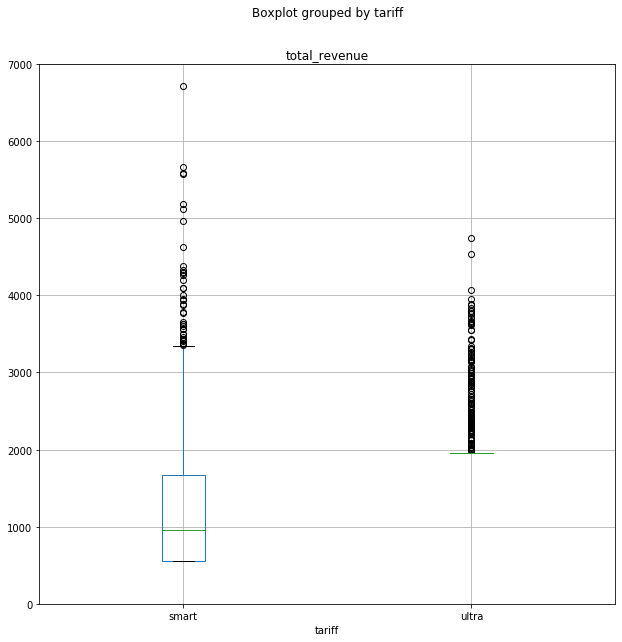

In [67]:
#Посмотроим boxplot 
duration_union.boxplot('total_revenue', by='tariff', figsize=(10,10)).set_ylim(0,7000)

По графику можно предварительно сказать, что в целом клиенты тарифа Ультра остаются в рамках своего тарифа (в плане выручки). Рассмотрим более детально каждый параметр тарифов =)

<font color='green'>Очень наглядное сравнение, молодец.

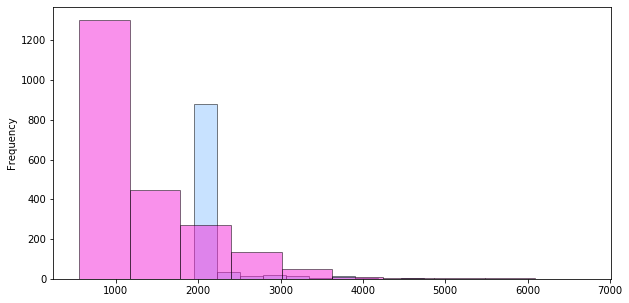

In [68]:
fig, ax = plt.subplots(figsize=(10,5))
grafik_1 = duration_union[duration_union['tariff'] == 'ultra']['total_revenue'].plot(kind='hist', bins=10, ec='black', ax=ax, color='#92c6ff', alpha=0.5)
grafik_2 = duration_union[duration_union['tariff'] == 'smart']['total_revenue'].plot(kind='hist', bins=10, ec='black', ax=ax, color='#f525d9', alpha=0.5)

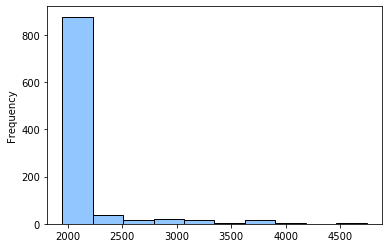

In [69]:
duration_union[duration_union['tariff'] == 'ultra']['total_revenue'].plot(kind='hist', bins=10, ec='black', color='#92c6ff')

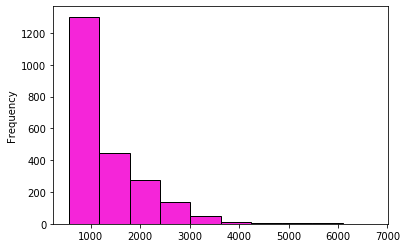

In [70]:
duration_union[duration_union['tariff'] == 'smart']['total_revenue'].plot(kind='hist', bins=10, ec='black', color='#f525d9')

In [71]:
duration_union.groupby('tariff')\
  .agg({'total_revenue':['mean','median','var','std']})\
  .style.format("{:.2f}")

#### Вывод:
Мы наблюдаем, что в среднем пользователям удается оставаться в рамках тарифа "Ультра", переплаты за этот тариф есть, но они незначительные и не частые. 
Однако, пользователи тарифа "Смарт" в среднем переплачивают почти в два раза, чем ежемесечная стоимость их тарифа и регулярно. 

#### Сколько минут разговора требуется пользователям каждого тарифа в месяц?
- В тариф "Смарт" включено 500 минут разговора. 
Стоимость услуг сверх тарифного пакета: минута разговора - 3 рубля. 
- В тариф "Ультра" включено 3000 минут разговора. 
Стоимость услуг сверх тарифного пакета: минута разговора - 1 рубль. 

(0, 3000)

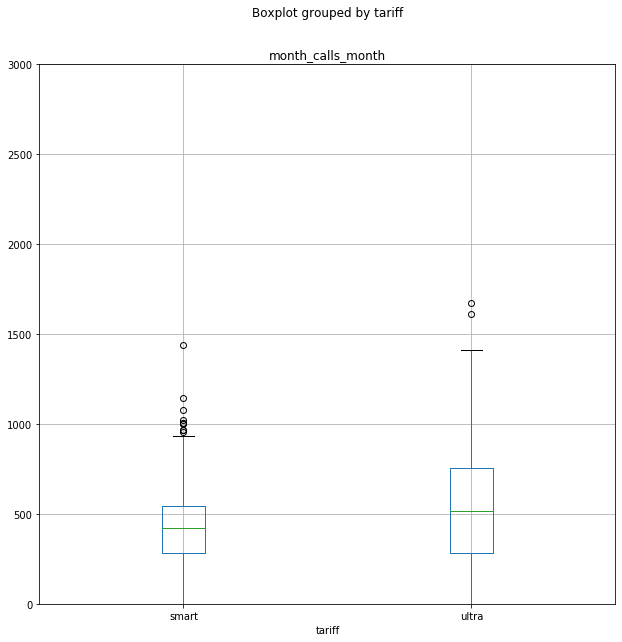

In [72]:
duration_union.boxplot('month_calls_month', by='tariff', figsize=(10,10)).set_ylim(0,3000)

Предварительно можно сказать, что в среднем пользователи остаются в рамках своих тарифов. Рассмотрим более детально этот параметр. 

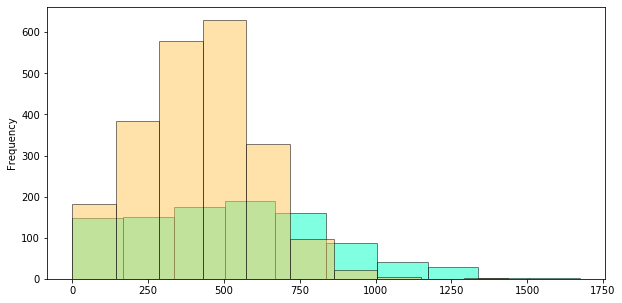

In [73]:
fig, ax = plt.subplots(figsize=(10,5))
grafik_3 = duration_union[duration_union['tariff'] == 'ultra']['month_calls_month'].plot(kind='hist', bins=10, ec='black', ax=ax, color='#05ffc5', alpha=0.5)
grafik_4 = duration_union[duration_union['tariff'] == 'smart']['month_calls_month'].plot(kind='hist', bins=10, ec='black', ax=ax, color='#ffc757', alpha=0.5)

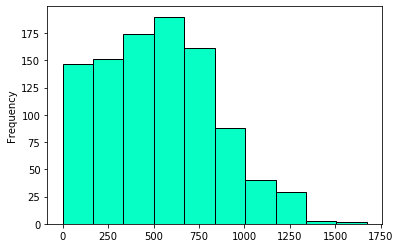

In [74]:
duration_union[duration_union['tariff'] == 'ultra']['month_calls_month'].plot(kind='hist', bins=10, ec='black', color='#05ffc5')

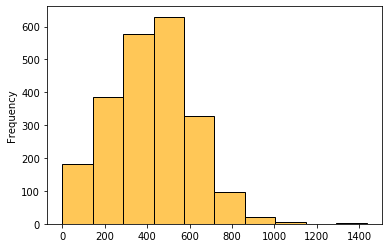

In [75]:
duration_union[duration_union['tariff'] == 'smart']['month_calls_month'].plot(kind='hist', bins=10, ec='black', color='#ffc757')

In [76]:
duration_union.groupby('tariff')\
  .agg({'month_calls_month':['mean','median','var','std']})\
  .style.format("{:.2f}")

#### Выводы:
Мы наблюдаем и в тарифе "Смарт", и в тарифе "Ультра" не использованные минуты, которые входят в пакет. В тарифе "Смарт" около 400 минут в среднем используется, а в тарифный план входит 500 минут. При тарифе "Ультра" люди используют в среднем около 500 минут из 3000 минут, которые входят в тарифный план. Предположу, что такое может быть из-за того, что люди все чаще разговаривают по Whats App, FaceTime и другие приложения, для которых необходим только интернет =)

<font color='green'>Или вовсе используют симку для планшета.

#### Cколько сообщений требуется пользователям каждого тарифа в месяц?
- В тариф "Смарт" включено 50 сообщений. Стоимость сверх тарифного пакета: сообщение - 3 рубля
- В тариф "Ультра" включено 1000 сообщений. Стоимость сверх тарифного пакета: сообщение - 1 рубль

(0, 400)

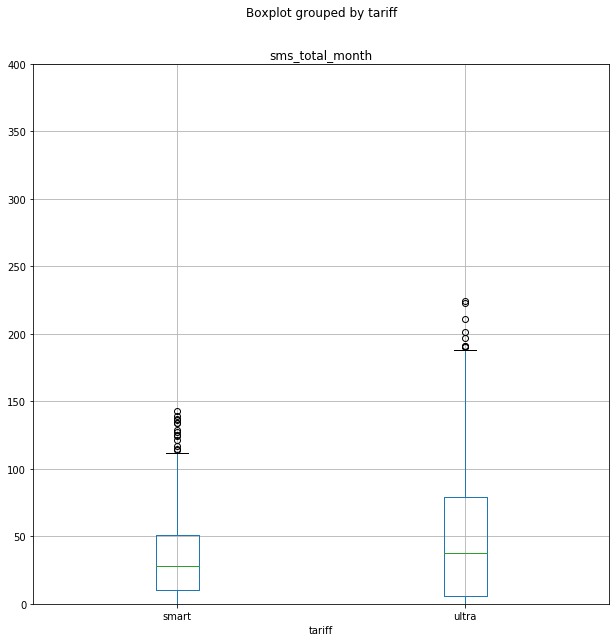

In [77]:
duration_union.boxplot('sms_total_month', by='tariff', figsize=(10,10)).set_ylim(0,400)

Есть выбросы, но в целом пользователи остаются в рамках своих тарифных планов. Можно даже сказать, что пишут смс примерно одинаково немного.

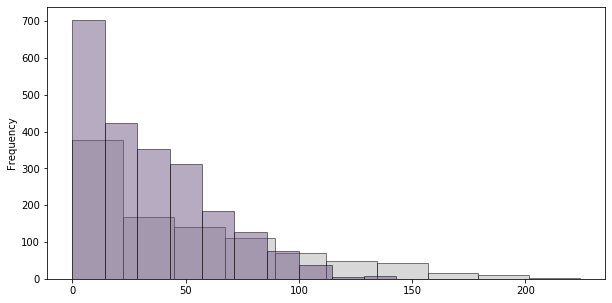

In [78]:
fig, ax = plt.subplots(figsize=(10,5))
grafik_3 = duration_union[duration_union['tariff'] == 'ultra']['sms_total_month'].plot(kind='hist', bins=10, ec='black', ax=ax, color='#b3b3b3', alpha=0.5)
grafik_4 = duration_union[duration_union['tariff'] == 'smart']['sms_total_month'].plot(kind='hist', bins=10, ec='black', ax=ax, color='#6f5985', alpha=0.5)

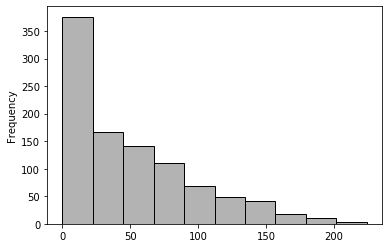

In [79]:
duration_union[duration_union['tariff'] == 'ultra']['sms_total_month'].plot(kind='hist', bins=10, ec='black', color='#b3b3b3')

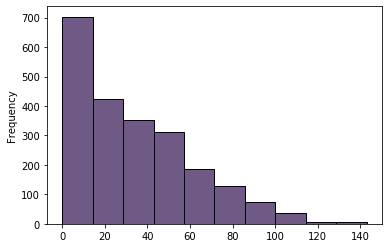

In [80]:
duration_union[duration_union['tariff'] == 'smart']['sms_total_month'].plot(kind='hist', bins=10, ec='black', color='#6f5985')

In [81]:
duration_union.groupby('tariff')\
  .agg({'sms_total_month':['mean','median','var','std']})\
  .style.format("{:.2f}")

#### Вывод:
Проведя анализ, мы видим, что пользователи друх рассматриваемых тарифов укладываются в тарифные пакеты. Пользователи тарифа "Смарт" еще как-то используют эту услугу в рамках своего тарифа, но вот пользователи тарифа "Ультра" не используют и на 10% эту услугу. Опять же, предположу, что возможно все пользуются приложениями, где можно переписываться сколько душе угодно, главное, чтобы был интернет. 

#### Какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
- В тариф "Смарт" включено 15 Гб, за каждый дополнительно использованный 1 Гб доплата 200 рублей. 
- В тариф "Ультра" включено 30 Гб, за каждый дополнительно использованный 1 Гб доплата 150 рублей. 

(0, 150000)

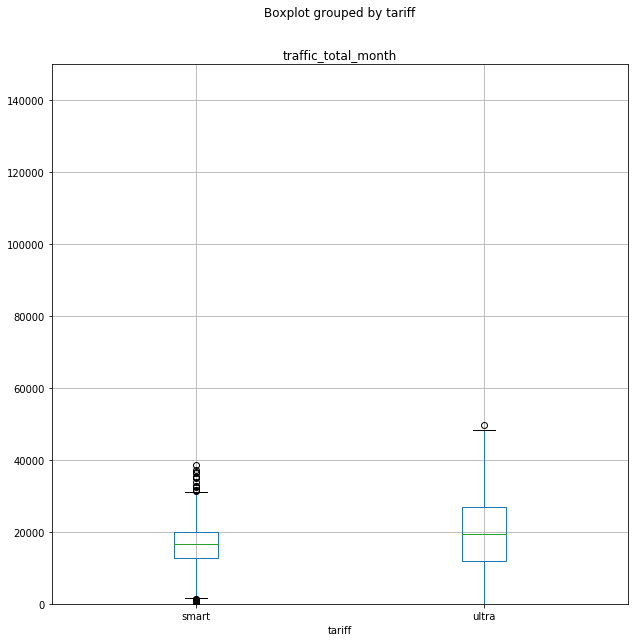

In [82]:
duration_union.boxplot('traffic_total_month', by='tariff', figsize=(10,10)).set_ylim(0,150000)

Медиана лежит рядом, однако пользователи тарифа "Смарт" больше выходят за пределы тарифа, у пользователей тарифа "Ультра" в среднем есть запас трафика. 

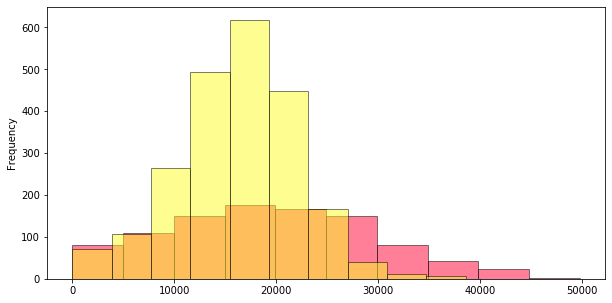

In [83]:
fig, ax = plt.subplots(figsize=(10,5))
grafik_5 = duration_union[duration_union['tariff'] == 'ultra']['traffic_total_month'].plot(kind='hist', bins=10, ec='black', ax=ax, color='#ff0033', alpha=0.5)
grafik_6 = duration_union[duration_union['tariff'] == 'smart']['traffic_total_month'].plot(kind='hist', bins=10, ec='black', ax=ax, color='#fefe22', alpha=0.5)

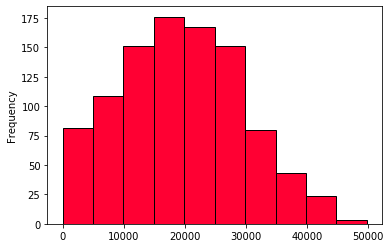

In [84]:
duration_union[duration_union['tariff'] == 'ultra']['traffic_total_month'].plot(kind='hist', bins=10, ec='black', color='#ff0033')

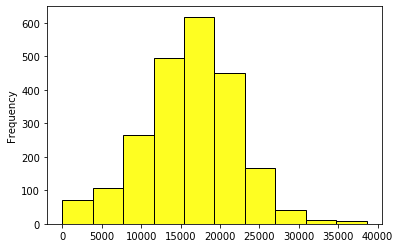

In [85]:
duration_union[duration_union['tariff'] == 'smart']['traffic_total_month'].plot(kind='hist', bins=10, ec='black', color='#fefe22')

<font color='green'>Очень наглядные разнообразные графики с разными тарифами в одних осях. Визуализации аккуратны и снабжены подписями. 

In [86]:
duration_union.groupby('tariff')\
  .agg({'traffic_total_month':['mean','median','var','std']})\
  .style.format("{:.2f}")

#### Вывод: 
В целом мы видим, что пользователи обоих тарифов активно используют трафик, который входит в тарифный план. Пользователи тарифа "Смарт" даже выходят за рамки тарифа, а вот у пользователей тарифа "Ультра" есть небольшой запас трафика. 

### Общий вывод по Шагу 3: 
Проведя анализ поведения пользователей можно говорить о том, что пользователи обоих тарифов в целом ведут себя одинаково. Однако, все же пользователи тарифа "Смарт" переплачивают в среднем за дополнительные услуги, а именно интернет, несмотря на то, что у них остаются в запасе минуты для звонков и сообщения (этими услугами они не пользуются в полном объеме). 
Так как у тарифа "Ультра" включено больше услуг, то и переплаты встречаются нечасто. Наиболее активно пользуются интернетом, нежели остальными включенными услугами. 

<font color=green>Итак, статистические параметры посчитаны, гистораммы построены, по ним сделаны верные выводы. Довольно подробно описано поведение пользователей: сколько им нужно трафика/минут/сообщений в месяц, хватает ли им, часто ли они переплачивают и за что конктерно. Даже нечего добавить.

In [87]:
#Напишем для дальнейшего анализа функцию удаления выбросов: 

def del_outliers(data, column,graphic=0,x=10,y=10):
    q1 = data[column].quantile(0.25)                 
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    outliers = (data[column] >= (q1 - 1.5*iqr)) & (data[column] <= (q3 + 1.5*iqr))
    if graphic == 1:
        return data.loc[outliers].boxplot([column], figsize=(x,y))
    else:
        return data.loc[outliers]

### Шаг 4. Проверьте гипотезы
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

In [88]:
duration_union.head()

,user_id,calls_total_month,month_calls_month,sms_total_month,traffic_total_month,age,churn_date,city,first_name,last_name,reg_date,tariff,month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,higher_tariff,total_revenue
0,1000,52.00,408.00,81.00,14070,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,May,1000,30720,3000,1950,150,1,1,0.00,"1,950.00"
1,1000,46.00,333.00,70.00,9827,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,May,1000,30720,3000,1950,150,1,1,0.00,"1,950.00"
2,1000,47.00,340.00,75.00,14016,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,May,1000,30720,3000,1950,150,1,1,0.00,"1,950.00"
3,1000,43.00,172.00,60.00,23257,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,May,1000,30720,3000,1950,150,1,1,0.00,"1,950.00"
4,1000,22.00,159.00,22.00,2256,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,May,1000,30720,3000,1950,150,1,1,0.00,"1,950.00"


#### Проверяем гипотезу №1
Получается гипотеза о равенстве средних двух генеральных совокупностей.
- Н0 (нулевая гипотеза) - средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается
- H1 (альтернативная гипотеза) - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Применим критерий Стьюдента, так как выборки, которые мы рассматриваем, никак не зависят друг от друга. 
Перед проверкой гипотезы предположу, что, скорее всего, нулевая гипотеза не подтвердится. Так как до этого все расчеты, которые мы производили как раз говорят о том, что средняя выручка при тарифе Ultra выше, чем у тарифа Smart. 

In [89]:
smart = duration_union[duration_union['tariff'] == 'smart']
smart = smart['total_revenue']

ultra = duration_union[duration_union['tariff'] == 'ultra']
ultra = ultra['total_revenue']

alpha = 0.05

results = st.ttest_ind(ultra, smart)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  8.220315760582737e-191
Отвергаем нулевую гипотезу


<font color='green'>Здесь без вопросов, гипотезы сформулированы и проверены верно. Выборки для проверки построены верно. Методы выбраны верно. Ты отлично понимаешь принцип проверки статистических гипотез.

~~<font color='brown'>Единственное, я бы не стал здесь удалять выбросы. Их немного, они не сильно отличаются от типичных значений. (В отличии, например, от квартир за 700.000.000 в прошлом проекте.) Плюс в некоторых индустриях, например в играх с микротранзакциями, 5-10% пользователей делают 90% выручки и их обязательно нужно учитывать.~~ <font color='black'> сделала без выбросов (функцию по удалению выбросов оставила, на всякий =)). 

<b>UPD: <font color='green'>На то они и функции, чтобы их потом использовать где-от еще :)

#### Вывод: 
Как мы и предполагали нулевая гипотеза не подтвердилась. Останавливаемся на альтернативной гипотезе, средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается

#### Проверяем гипотезу №2
Получается гипотеза о равенстве средних двух генеральных совокупностей.

- Н0 (нулевая гипотеза) - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
- H1 (альтернативная гипотеза) - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Перед началом расетов предположу, что нулевая гипотеза не подтвердится. 

In [90]:
#Рассмотрим какие города представлены в нашей выборке
duration_union['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Курган', 'Барнаул', 'Красноярск', 'Архангельск', 'Липецк',
       'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Волжский', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [91]:
#воспользуем методом np.where 
duration_union['city_final'] = np.where(duration_union['city'] == 'Москва', 'Moscow', 'Region')

In [92]:
moscow = duration_union[duration_union['city_final'] == 'Moscow']
moscow = moscow['total_revenue']

In [93]:
region = duration_union[duration_union['city_final'] == 'Region']
region = region['total_revenue']

In [94]:
alpha = .05

results = st.ttest_ind(moscow, region)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.4741107329003996
Не получилось отвергнуть нулевую гипотезу


#### Вывод: 
Н0 (нулевая гипотеза) - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других подтвердилась. Не имеет значение из какого города пользователь, в среднем одинаковая выручка как из Москвы, так и из регионов (Мое предположение оказалось не верным =)). 

<font color='green'>Да, интернет всем одинаково необходим :)

### Шаг 5. Общий вывод: 
Итак, коммерческий департамент хочет понять какой тариф приносит больше денег.
Проведя анализ предоставленной нами выборки, можно сделать следующие выводы: 
1. Пользователи обоих тарифов активно не используют некоторые включенные в их тарифы услуги, а именно: предоставленными минутами и сообщениями. В тарифе "Смарт" пользователи в среднем разговаривают около 400 минут из предоставленных 500. При тарифе "Ультра" люди используют в среднем около 500 минут из 3000 минут, которые входят в тарифный план.
2. Пользователи обоих тарифов укладываются в предоставленными их тарифными планами количество сообщений. При тарифе "Смарт" - в среднем около 35 сообщений из предоставленных 50, при тарифе "Ультра" - в среднем пользователи не используют и 10% предоставленных ими сообщений (50 сообщений из 1000). 
3. Пользователи обоих тарифов активно используют трафик, который входит в тарифный план. Пользователи тарифа "Смарт" даже выходят за рамки тарифа, а вот у пользователей тарифа "Ультра" есть небольшой запас трафика.
4. Пользователи тарифа "Смарт" регулярно переплачивают за дополнительные услуги, по-мимо ежемесячной платы в 550 рублей, в среднем почти в два раза, а когда и больше (переплачивают, скорее всего, в основном из-за дополнительного использования интернет-трафика). 
5. Пользователи тарифа "Ультра" в основном укладываются в свой тарифный план. 
6. Не имеет значение из какого города пользователь, в среднем одинаковая выручка как из Москвы, так и из регионов. 

В среднем приносит больше тариф "Смарт" так как из рассматриваемой нами выборки основное количество пользователей - пользователи тарифа "Смарт" + пользователи регулярно переплачивают в месяц. 
Если рассматриваться пользователей, то один пользователей из тарифа "Ультра" в среднем приносит в месяц чуть больше денег, чем пользователь тариа "Смарт" (но не надо забывать, что пользователей из тарифа "Ультра" меньше по количеству). Поэтому в среднем средняя вырчка пользователей обоих тарифов не отличается. 

### Рекомендации: 
1. Усовершенствовать тарифные планы (многие предоставленные услуги в таком объеме не нужны). 
2. Предполагаю, что из-за регулярных ежемесячных переплат пользователи (особенно из тарифного плана "Смарт") могут начать переходить к другим оператарам или на другие тарифный планы. В связи с этим необходимо обратить внимание в первую очередь на тариф "Смарт". 



<font color='green'>Отличный структурированный вывод. Резюмируются все полученные результаты, дается не только ответ на центральный вопрос, но и практические советы заказчику по улучшению тарифов. 

<font color='green'>К оформлению работы также претензий нет. Соблюдена структура проекта, полноценно используется разметка для комментариев. Код чистый, выводы понятные.

---

<font color='blue'>Итак, очень хорошая работа, ты показываешь отличные знания нового материала и умение их применять. Ты уверенно объединяешь и аггрегируешь данные из разных датафреймов, считаешь статистические параметры и работаешь с гипотезами. Также строишь хорошие, очень наглядные графики. У тебя верные и четкие выводы.  
    Однако у меня есть несколько замечаний, уверен, тебе не составит труда их учесть и довести работу до идеала. Буду ждать доработанный проект, успехов!

Алексей, приветствую! Спасибо за Ваши комментарии, учту их при следующем проекте =) Постарался доработать все замечании, надеюсь, что теперь все "ок" =) И поздравляю с окончанием КАРАНТИНА!)

<b>UPD: <font color='blue'>Что, же ожидаемо отличная доработка, теперь можно с чистой совестью принимать. Успехов в сборном проекте!  
    Тоже поздравляю, мы это пере